# Import Library yang dibutuhkan

In [ ]:
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk visualisasi data
import numpy as np  # Untuk operasi numerik dan array
import tensorflow as tf  # Untuk membangun dan melatih model deep learning
import re  # Untuk pemrosesan teks dengan regular expressions
from tensorflow.keras.preprocessing.text import Tokenizer  # Untuk tokenisasi teks (mengubah kata menjadi token)
import tensorflow as tf  # Mengimpor TensorFlow dua kali mungkin tidak perlu
from sklearn.metrics import accuracy_score  # Untuk menghitung akurasi
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi set pelatihan dan pengujian
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score  # Untuk evaluasi model
import seaborn as sns  # Untuk visualisasi matriks kebingunguan dan lainnya
plt.style.use('ggplot')  # Menggunakan style visualisasi 'ggplot' di Matplotlib

# Load Dataset

In [ ]:
# Membaca dataset yang berisi data hoax (palsu) yang sudah dibersihkan
fake_df = pd.read_csv('cleaned_dataset_turnbackhoax_10_cleaned.csv')  # Dataset yang berisi berita hoax (palsu)

# Membaca dataset yang berisi data berita nyata (real) yang sudah dibersihkan
real_df = pd.read_csv('cleaned_dataset_scrap.csv')  # Dataset yang berisi berita asli (real)

# Menambahkan kolom 'label'

In [ ]:
# Menambahkan kolom 'label' pada DataFrame fake_df dan memberikan nilai 0 untuk berita hoax (palsu)
fake_df['label'] = 0  # Label 0 menandakan bahwa data ini adalah berita hoax

# Menambahkan kolom 'label' pada DataFrame real_df dan memberikan nilai 1 untuk berita yang nyata
real_df['label'] = 1  # Label 1 menandakan bahwa data ini adalah berita asli (nyata)

# Visualisasi Dataset

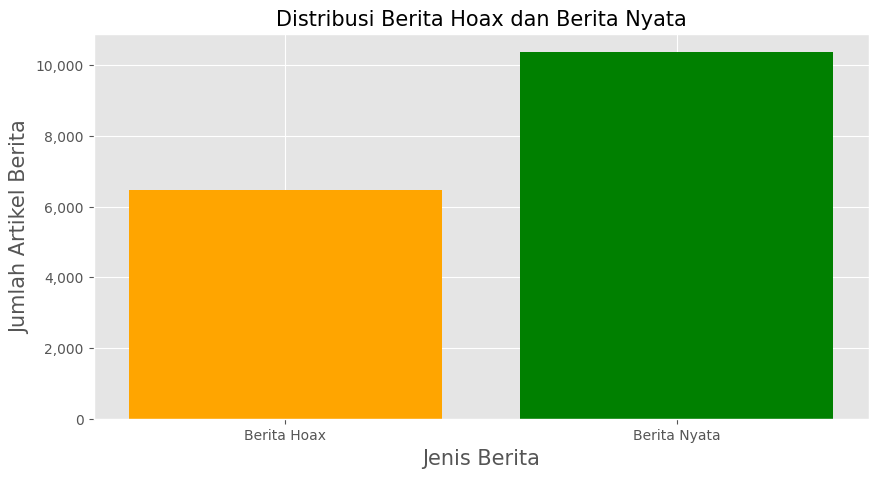

In [ ]:
import matplotlib.ticker as ticker

# Membuat plot pertama untuk distribusi jumlah berita hoax dan berita nyata
plt.figure(figsize=(10, 5))  # Mengatur ukuran plot
plt.bar('Berita Hoax', len(fake_df), color='orange')  # Membuat bar untuk berita hoax dengan warna oranye
plt.bar('Berita Nyata', len(real_df), color='green')  # Membuat bar untuk berita nyata dengan warna hijau
plt.title('Distribusi Berita Hoax dan Berita Nyata', size=15)  # Menambahkan judul pada plot
plt.xlabel('Jenis Berita', size=15)  # Menambahkan label untuk sumbu x (jenis berita)
plt.ylabel('Jumlah Artikel Berita', size=15)  # Menambahkan label untuk sumbu y (jumlah artikel berita)

# Menambahkan format titik per-seribu pada sumbu Y
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Menampilkan plot
plt.show()

In [ ]:
print('Difference in news articles:',len(fake_df)-len(real_df))

Difference in news articles: -3890


# Gabung Dataset

In [ ]:
# Gabung dataset fake dan real
news_df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)

In [ ]:
news_df

,Text,tagging,label
0,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,hoax,0
1,ini bener gasih?? Ya Allah gimna keadaan pa ha...,hoax,0
2,Nenek lampir pemimpin partai banteng bercula s...,hoax,0
3,gerombolan kulup banyak menyusup ke ormas2 isl...,hoax,0
4,M g w ti Di Panggil B4waslu:exclamation: Bvntu...,hoax,0
...,...,...,...
16839,Jakarta Wakapolda Metro Jaya Brigjen Djati Wiy...,non-hoax,1
16840,Jakarta Lembaga survei Indikator merilis hasil...,non-hoax,1
16841,Jakarta Lembaga survei Indikator merilis hasil...,non-hoax,1
16842,Daftar Isi Cara Cek Quick Count Pilkada Jateng...,non-hoax,1


# Bagi dataset jadi data train dan test

In [ ]:
# Mengambil kolom 'Text' sebagai fitur (fitur teks berita)
features = news_df['Text']  # Fitur (berita teks) yang akan digunakan dalam model

# Mengambil kolom 'label' sebagai target (label berita hoax atau nyata)
targets = news_df['label']  # Target (label) yang menunjukkan apakah berita hoax (0) atau nyata (1)

# Membagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi 80% untuk data latih dan 20% untuk data uji
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)
# - X_train: Fitur untuk data latih
# - X_test: Fitur untuk data uji
# - y_train: Target untuk data latih
# - y_test: Target untuk data uji
# test_size=0.20 berarti 20% data akan digunakan untuk pengujian dan sisanya untuk pelatihan
# random_state=18 digunakan untuk memastikan pembagian data yang konsisten setiap kali kode dijalankan

# Fungsi pembersihan anomali text

In [ ]:
# Fungsi untuk menormalkan (membersihkan) teks
def normalize(data):
    normalized = []  # Membuat list kosong untuk menyimpan hasil teks yang sudah dinormalisasi
    for i in data:
        i = i.lower()  # Mengubah semua huruf menjadi huruf kecil

        # Menghilangkan URL (alamat situs web)
        i = re.sub('https?://\S+|www\.\S+', '', i)

        # Menghilangkan karakter non-kata dan mengganti dengan spasi (seperti tanda baca dan simbol)
        i = re.sub('\\W', ' ', i)

        # Menghilangkan karakter newline
        i = re.sub('\n', '', i)

        # Mengganti spasi ekstra yang lebih dari satu dengan satu spasi
        i = re.sub(' +', ' ', i)

        # Menghilangkan spasi di awal teks
        i = re.sub('^ ', '', i)

        # Menghilangkan spasi di akhir teks
        i = re.sub(' $', '', i)

        normalized.append(i)  # Menambahkan teks yang sudah dinormalisasi ke list
    return normalized  # Mengembalikan hasil teks yang sudah dibersihkan

# Menerapkan normalisasi pada data latih (X_train) dan data uji (X_test)
X_train = normalize(X_train)  # Menormalkan teks pada data latih
X_test = normalize(X_test)  # Menormalkan teks pada data uji

# Membuat tokenizer

In [ ]:
# Menentukan batas maksimum jumlah kata (vocabulary) yang akan digunakan oleh tokenizer
max_vocab = 10000  # Hanya mempertimbangkan 10.000 kata yang paling sering muncul

# Membuat objek Tokenizer untuk memetakan kata-kata menjadi indeks berdasarkan frekuensinya
tokenizer = Tokenizer(num_words=max_vocab)  # 'num_words' menentukan jumlah maksimal kata yang akan dipertimbangkan

# Melatih tokenizer untuk memahami teks yang ada pada data latih (X_train)
tokenizer.fit_on_texts(X_train)  # Tokenizer akan mempelajari teks pada X_train dan membuat kamus (vocabulary)

# Ubah text jadi data train dan data test

In [ ]:
# Mengubah teks dalam data latih (X_train) menjadi urutan angka (token) berdasarkan vocabulary yang sudah dibuat
X_train = tokenizer.texts_to_sequences(X_train)  # Mengubah teks X_train menjadi urutan token (angka)

# Mengubah teks dalam data uji (X_test) menjadi urutan angka (token) berdasarkan vocabulary yang sudah dibuat
X_test = tokenizer.texts_to_sequences(X_test)  # Mengubah teks X_test menjadi urutan token (angka)

# Config panjang text data train dan test

In [ ]:
# Menyelaraskan panjang urutan teks pada data latih (X_train) agar semua urutan memiliki panjang yang sama
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='post', maxlen=256)
# - 'padding='post'' berarti penambahan (padding) dilakukan setelah urutan teks.
# - 'maxlen=256' berarti panjang maksimum urutan teks dibatasi menjadi 256 kata (jika teks lebih pendek, akan ditambahkan padding; jika lebih panjang, akan dipotong).

# Menyelaraskan panjang urutan teks pada data uji (X_test) agar semua urutan memiliki panjang yang sama
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding='post', maxlen=256)
# - Sama seperti pada X_train, teks pada X_test akan diselaraskan panjangnya hingga 256 kata.

In [ ]:
print(X_train.shape)  # Pastikan output ini sesuai dengan model Anda
print(y_train.shape)


(13475, 256)
(13475,)


# Membangun model Sequential

In [ ]:
# Membangun model Sequential dengan beberapa lapisan untuk klasifikasi teks
model = tf.keras.Sequential([  # Model sequential, artinya lapisan-lapisan akan ditambahkan secara berurutan

    # Lapisan embedding untuk mengubah token angka menjadi vektor embedding
    tf.keras.layers.Embedding(max_vocab, 128),  # 'max_vocab' adalah jumlah kata dalam vocabulary, '128' adalah dimensi vektor embedding

    # Lapisan LSTM dua arah pertama (Bidirectional LSTM)
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),  # LSTM dengan 64 unit, dan outputnya berupa urutan (return_sequences=True)

    # Lapisan LSTM dua arah kedua (Bidirectional LSTM)
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),  # LSTM dengan 16 unit, hanya output akhir yang diambil (return_sequences=False secara default)

    # Lapisan Dense untuk melakukan pemrosesan selanjutnya setelah LSTM
    tf.keras.layers.Dense(64, activation='relu'),  # Lapisan Dense dengan 64 unit dan fungsi aktivasi ReLU untuk non-linearitas

    # Lapisan Dropout untuk mencegah overfitting
    tf.keras.layers.Dropout(0.5),  # Dropout dengan rate 0.5 untuk mengurangi kemungkinan overfitting

    # Lapisan Dense output untuk klasifikasi
    tf.keras.layers.Dense(1)  # Lapisan Dense dengan 1 unit (output), untuk output klasifikasi biner (0 atau 1)
])

# Training model

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=4,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/4
405/405 ━━━━━━━━━━━━━━━━━━━━ 305s 726ms/step - accuracy: 0.6501 - loss: 0.4495 - val_accuracy: 0.9889 - val_loss: 0.0609
Epoch 2/4
405/405 ━━━━━━━━━━━━━━━━━━━━ 250s 549ms/step - accuracy: 0.9939 - loss: 0.0443 - val_accuracy: 0.9948 - val_loss: 0.0246
Epoch 3/4
405/405 ━━━━━━━━━━━━━━━━━━━━ 262s 547ms/step - accuracy: 0.9973 - loss: 0.0164 - val_accuracy: 0.9955 - val_loss: 0.0155
Epoch 4/4
405/405 ━━━━━━━━━━━━━━━━━━━━ 262s 547ms/step - accuracy: 0.9991 - loss: 0.0060 - val_accuracy: 0.9970 - val_loss: 0.0123


# Menampilkan arsitektur Model

In [ ]:
model.summary()  # Menampilkan ringkasan arsitektur model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 256, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256, 128)            │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 32)                  │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,198,661 (16.02 MB)

 Trainable params: 1,399,553 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,799,108 (10.68 MB)

# Visualisasi hasil training

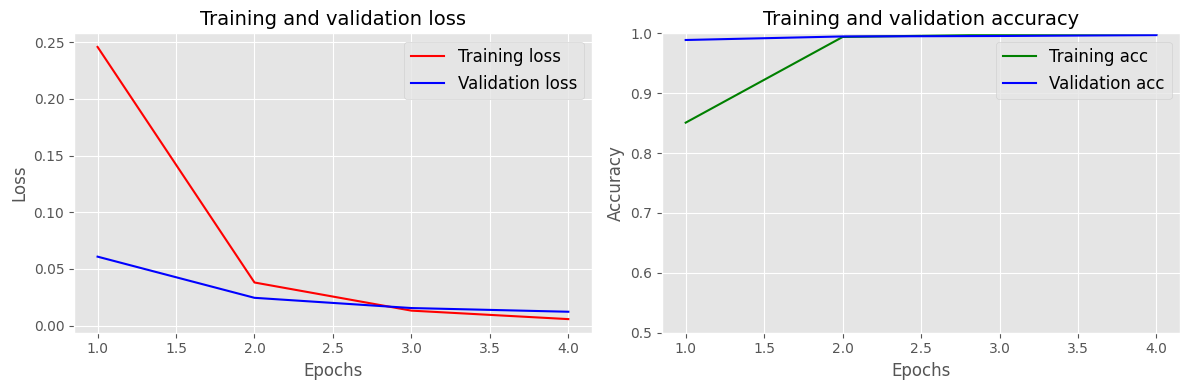

In [ ]:
import matplotlib.pyplot as plt  # Mengimpor pustaka untuk visualisasi data

# Mengambil metrik pelatihan dan validasi dari objek history
epochs = range(1, len(history.history['accuracy']) + 1)  # Mengambil jumlah epoch
loss = history.history['loss']  # Mendapatkan nilai loss untuk data latih
val_loss = history.history['val_loss']  # Mendapatkan nilai loss untuk data validasi
acc = history.history['accuracy']  # Mendapatkan akurasi untuk data latih
val_acc = history.history['val_accuracy']  # Mendapatkan akurasi untuk data validasi

# Membuat figure dengan 1 baris dan 2 kolom untuk subplot
plt.figure(figsize=(12, 4))  # Ukuran plot lebih lebar dan lebih rendah

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)  # Subplot pertama (di kiri)
plt.plot(epochs, loss, 'r', label='Training loss')  # Plot loss untuk pelatihan dengan warna merah
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # Plot loss untuk validasi dengan warna biru
plt.title('Training and validation loss', size=14)  # Judul plot
plt.xlabel('Epochs', size=12)  # Label sumbu x (Epochs)
plt.ylabel('Loss', size=12)  # Label sumbu y (Loss)
plt.legend(prop={'size': 12})  # Menampilkan legenda dengan ukuran font lebih kecil

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)  # Subplot kedua (di kanan)
plt.plot(epochs, acc, 'g', label='Training acc')  # Plot akurasi untuk pelatihan dengan warna hijau
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # Plot akurasi untuk validasi dengan warna biru
plt.title('Training and validation accuracy', size=14)  # Judul plot
plt.xlabel('Epochs', size=12)  # Label sumbu x (Epochs)
plt.ylabel('Accuracy', size=12)  # Label sumbu y (Akurasi)
plt.legend(prop={'size': 12})  # Menampilkan legenda dengan ukuran font lebih kecil
plt.ylim((0.5, 1))  # Menentukan batas untuk sumbu y antara 0.5 dan 1 (agar lebih fokus pada akurasi yang lebih tinggi)

# Tampilkan semua plot dalam satu tampilan
plt.tight_layout()  # Mengatur agar elemen-elemen dalam plot tidak bertumpuk
plt.show()  # Menampilkan plot

# Evaluasi model

In [ ]:
model.evaluate(X_test, y_test)  # Evaluasi model pada data uji dan menampilkan hasilnya


106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.9979 - loss: 0.0075


[0.010592962615191936, 0.9979222416877747]

# Uji coba prediksi

In [ ]:
# Melakukan prediksi pada data uji (X_test) menggunakan model yang telah dilatih
pred = model.predict(X_test)  # Hasil prediksi berupa probabilitas (logits) untuk setiap contoh dalam data uji

# Membuat list untuk menyimpan prediksi biner (0 atau 1)
binary_predictions = []  # List kosong yang akan menyimpan hasil prediksi dalam bentuk biner

# Mengubah prediksi probabilitas menjadi prediksi biner
for i in pred:  # Iterasi untuk setiap prediksi pada data uji
    if i >= 0.5:  # Jika probabilitas lebih besar atau sama dengan 0.5, prediksi dianggap '1' (berita nyata)
        binary_predictions.append(1)
    else:  # Jika probabilitas lebih kecil dari 0.5, prediksi dianggap '0' (berita hoax)
        binary_predictions.append(0)

# binary_predictions sekarang berisi daftar hasil prediksi biner (0 atau 1) untuk setiap contoh di X_test

106/106 ━━━━━━━━━━━━━━━━━━━━ 14s 131ms/step


In [ ]:
def predict_news(model, tokenizer, text, threshold=0.5):
    """
    Fungsi untuk memprediksi apakah berita hoax atau fakta, dengan probabilitas untuk kedua kategori.
    Args:
        model: Model machine learning yang telah dilatih.
        tokenizer: Tokenizer yang digunakan untuk memproses teks.
        text: String, berita yang ingin diprediksi.
        threshold: Batas probabilitas untuk klasifikasi (default 0.5).
    Returns:
        result: Kategori berita (Hoax/Fakta) dan probabilitasnya.
    """
    # Tokenisasi input teks menggunakan texts_to_sequences
    sequences = tokenizer.texts_to_sequences([text])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=42, padding='post', truncating='post')

    # Reshape inputs to have the correct dimensions for the model
    inputs = inputs.reshape(1, inputs.shape[1])  # Reshape to (1, 42)

    # Melakukan prediksi
    pred = model.predict(inputs)

    # Mendapatkan probabilitas (menggunakan sigmoid jika output belum diproses)
    prob = tf.nn.sigmoid(pred).numpy()[0][0]

    # Probabilitas untuk masing-masing kategori
    prob_hoax = 1 - prob
    prob_fakta = prob

    # Menentukan kategori berdasarkan threshold
    if prob >= threshold:
        category = "Fakta"
    else:
        category = "Hoax"

    return {
        "Kategori": category,
        "Probabilitas Hoax": f"{prob_hoax:.2%}",
        "Probabilitas Fakta": f"{prob_fakta:.2%}"
    }

# Input berita dari pengguna
berita_input = input("Masukkan teks berita untuk prediksi (Hoax/Fakta): ")

# Prediksi hasil untuk berita yang dimasukkan
hasil = predict_news(model, tokenizer, berita_input)

# Output hasil prediksi
print(f"\nKategori: {hasil['Kategori']}")
print(f"Probabilitas Hoax: {hasil['Probabilitas Hoax']}")
print(f"Probabilitas Fakta: {hasil['Probabilitas Fakta']}")


Masukkan teks berita untuk prediksi (Hoax/Fakta): Warwickshire - Real Madrid apes dua kali. Usai kalah dari Liverpool di Liga Champions, bus timnya juga mengalami kecelakaan. Melansir Daily Mail, bus tim Madrid terlibat dalam mengalami kecelakaan beruntun. Videonya beredar di media sosial.  Terlihat bus M40 berlogo Real Madrid menubruk bagian belakang truk kontainer di kawasan Warwickshire. Kecelakaan juga melibatkan mobil biasa, dan melansir Birmingham Mail, tak ada korban jiwa atas kejadian itu.  Tak ada pemain atau staf pelatih dalam bus tersebut. Hanya ada dua supir, petugas keamanan, dan manajer perjalanan dalam bus tersebut.  Hanya ada satu orang mengalami luka ringan di kaki. Kepolisian mengonfirmasi tak ada pemain dan staf pelatih Real Madrid di dalamnya.    Baca artikel sepakbola, "Apes! Real Madrid Disikat Liverpool, Pulangnya Kecelakaan di Jalan" selengkapnya https://sport.detik.com/sepakbola/uefa/d-7662206/apes-real-madrid-disikat-liverpool-pulangnya-kecelakaan-di-jalan.  D

In [ ]:
print('Accuracy on testing set:', accuracy_score(binary_predictions, y_test))
print('Precision on testing set:', precision_score(binary_predictions, y_test))
print('Recall on testing set:', recall_score(binary_predictions, y_test))

Accuracy on testing set: 0.997922232116355
Precision on testing set: 0.9985279685966634
Recall on testing set: 0.998038254046101


# Visualisasi confusion matrix

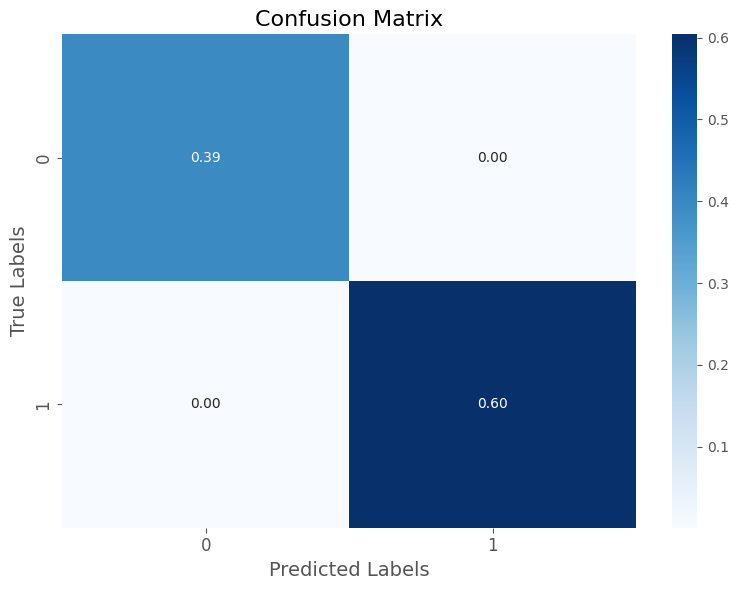

In [ ]:
import seaborn as sns  # Mengimpor pustaka untuk visualisasi data
import matplotlib.pyplot as plt  # Mengimpor pustaka untuk visualisasi data
from sklearn.metrics import confusion_matrix  # Mengimpor fungsi untuk membuat matriks kebingungan

# Confusion Matrix
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(8, 6))  # Ukuran lebih kecil
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax=ax, fmt='.2f', cmap='Blues')

# Labels, title, and ticks
ax.set_xlabel('Predicted Labels', size=14)  # Ukuran font label x lebih kecil
ax.set_ylabel('True Labels', size=14)      # Ukuran font label y lebih kecil
ax.set_title('Confusion Matrix', size=16)  # Ukuran font judul lebih kecil
ax.xaxis.set_ticklabels([0, 1], size=12)   # Ukuran font ticks lebih kecil
ax.yaxis.set_ticklabels([0, 1], size=12)   # Ukuran font ticks lebih kecil

plt.tight_layout()  # Supaya grafik tidak terpotong
plt.show()


In [ ]:
e = model.layers[0]  # Mengambil lapisan pertama (embedding) dari model
weights = e.get_weights()[0]  # Mendapatkan bobot (weights) dari lapisan embedding
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 128)


In [ ]:
word_index = list(tokenizer.word_index.keys())  # Mendapatkan daftar kata-kata dari tokenizer
word_index = word_index[:max_vocab-1]  # Memotong daftar kata-kata jika diperlukan

# Save model

In [ ]:
# Menyimpan arsitektur model dalam format JSON
model_json = model.to_json()
with open("config.json", "w") as json_file:
    json_file.write(model_json)

# Menyimpan bobot model dalam format .h5
model.save_weights("model.weights.h5")

# Menyimpan tokenizer dalam format JSON
tokenizer_json = tokenizer.to_json()
with open("tokenizer.json", "w") as json_file:
    json_file.write(tokenizer_json)


# Uji coba model untuk prediksi

In [ ]:
from tensorflow.keras.models import model_from_json

# Memuat struktur model dari file JSON
with open("config.json", "r") as json_file:
    loaded_model_json = json_file.read()

# Memuat model dari struktur JSON
loaded_model = model_from_json(loaded_model_json)

# Memuat bobot model dari file .h5
loaded_model.load_weights("model.weights.h5")

# Menyusun ulang model (jika perlu) setelah memuat bobot
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

def predict_news(model, tokenizer, text, threshold=0.5):
    """
    Fungsi untuk memprediksi apakah berita hoax atau fakta, dengan probabilitas untuk kedua kategori.
    Args:
        model: Model machine learning yang telah dilatih.
        tokenizer: Tokenizer yang digunakan untuk memproses teks.
        text: String, berita yang ingin diprediksi.
        threshold: Batas probabilitas untuk klasifikasi (default 0.5).
    Returns:
        result: Kategori berita (Hoax/Fakta) dan probabilitasnya.
    """
    # Tokenisasi input teks menggunakan texts_to_sequences
    sequences = tokenizer.texts_to_sequences([text])
    inputs = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=42, padding='post', truncating='post')

    # Reshape inputs to have the correct dimensions for the model
    inputs = inputs.reshape(1, inputs.shape[1])  # Reshape to (1, 42)

    # Melakukan prediksi
    pred = model.predict(inputs)

    # Mendapatkan probabilitas (menggunakan sigmoid jika output belum diproses)
    prob = tf.nn.sigmoid(pred).numpy()[0][0]

    # Probabilitas untuk masing-masing kategori
    prob_hoax = 1 - prob
    prob_fakta = prob

    # Menentukan kategori berdasarkan threshold
    if prob >= threshold:
        category = "Fakta"
    else:
        category = "Hoax"

    return {
        "Kategori": category,
        "Probabilitas Hoax": f"{prob_hoax:.2%}",
        "Probabilitas Fakta": f"{prob_fakta:.2%}"
    }

# Input berita dari pengguna
berita_input = input("Masukkan teks berita untuk prediksi (Hoax/Fakta): ")

# Prediksi hasil untuk berita yang dimasukkan
hasil = predict_news(loaded_model, tokenizer, berita_input)

# Output hasil prediksi
print(f"\nKategori: {hasil['Kategori']}")
print(f"Probabilitas Hoax: {hasil['Probabilitas Hoax']}")
print(f"Probabilitas Fakta: {hasil['Probabilitas Fakta']}")


Masukkan teks berita untuk prediksi (Hoax/Fakta):  Berita hoax ini mengklaim bahwa vaksin COVID-19 mengandung chip mikro yang dapat melacak aktivitas seseorang. Klaim ini telah dibantah oleh para ahli kesehatan yang menjelaskan bahwa vaksin aman dan tidak mengandung perangkat pelacak apapun


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step

Kategori: Hoax
Probabilitas Hoax: 99.88%
Probabilitas Fakta: 0.12%
